Time Series Anomaly Detection using Tensorflow and Keras in Python
==================================================================

Introduction
------------
The purpose of this notebook is to describe, using a sample dataset, the design and implementation in Python of a neural network using Tensorflow and Keras to provide anomaly detection for a time series dataset. 

- https://www.brainfacts.org/brain-anatomy-and-function/anatomy/2012/the-neuron
- https://alleninstitute.org/what-we-do/brain-science/news-press/articles/5-unsolved-mysteries-about-brain?gclid=CjwKCAiAzKqdBhAnEiwAePEjkpXxFmskBg7-UvzfIZkSbh5TygbiM0sqD8sTQCOU6c22DPfrx_wbaBoCwcwQAvD_BwE
- https://www.sciencefacts.net/parts-of-a-neuron.html
- https://en.wikipedia.org/wiki/Neural_network

1. Neural Networks, Artificial Intelligence and Machine Learning

In biological terms a neuron is one of the fundamental building blocks of the brain, with a human brain containing billions of neurons and trillions of connections between them. These connections, called synapses, allow for electrical signals to be transmitted between neurons, ultimately creating all of the brain functions that are still very far from being understood. A single neuron may be connected to many neurons and in turn it may take inputs from many other neurons. 

Hebb (The Organization of Behavior (1949)) proposed that learning happens when connections between neurons are strengthened over time by repeated firing together and can form large combinations or pathways that coninue to evolve. It was paraphrased as Hebbs Law, *"Neurons that fire together wire together."*

This theory of biological brain learning led to the development of artificial neural networks (ANN) based on computational units called neurons. Designed to mimic the operation of biological neurons these units can take inputs, provide weightings to the inputs, perform comptations and provide an output that can in turn be the input more neurons. A neural network consists of many interconnected neurons organised in one of more layers with weightings between them that can be adjusted during learning phases. 

The basic building block of the ANN is the Perceptron. (Image), invented in 1957 by Frank Rosenblatt. Based on what is called a threshold logic unit (TLU) It takes multiple inputs, each of which has a weighting associated with it, and generates a weighted sum. This sum then has a step or activation function applied so that the output is only triggered if the weighted sum is greater than the activation level threshold. The perceptron "learns" by adjusting the weights of each input based on the size of the error between the actual output and the expected output. This process continues until the smallest possible error is achieved. While a single perceptron has many limitations when stacked together into multiple layers (MLP) it becomes a very powerful learning and modelling entity. An MLP consists of an input layer, one or more intermediate layers or hidden layers and an output layer. Each layer is fully connected to its next  sequential layer. 

Artifical intelligence (AI) is a field associated with developing computer systems that can perform activties that mimic human intelligence, e.g. speech and image recgnition, language processing and decision making. 

Machine Learning (ML) which is a part of AI deals with the creation of methods, algorithms that use data to "learn" and can use this to make predictions about new data that is presented. In a more formal sense it is *the field of study that gives computers the ability to learn without being specifically programmed to do so* - Arthur Samuel,1959. Although the fundamentals of ML go back to the earliest days of computing it is in the last 20 - 30 years that ML models have found their way into many aspects of day to day life, e.g. 
- Email Spam detection
- Credit card fraud Detection.
- Production Line Inspection
- Predictive Machine Maintenance. 
These largely rely on being able to automatically detect anomalies, i.e. data instances that are outside of the norm that may indicate out of trend behaviour. For example a predictive machine maintenance program is trained on what are normal outputs from machine sensors and can then detect anomolies that indicate a potential breakdown that acan be addressed before any actual machine failure. 

There are a number of general categories of ML systems based on how the model is to be trained, the pimary being supervised / unsupervised, and reinforeement learning.
- Supervised. This is where the model is provided with a labelled training data set that includes the correct output for the set of inputs. A test data set is used then to validate the accuracy of the model. 
- Unsupervised. As the name suggests there is no training data, this is where a number of techniques are used to have the model automatically detect clusters and patterns in the data. 
- Reinforcement. This is a very different ML paradigm where an "agent" can extract information from its environment, perform actions as a result of the data and get rewards (postive or negative) based on those actions. Over time the model is updated to generate the best policy in a given situation that will maximise positive rewards or minimise negative rewards. 

This project will use a supervised learning approach for model generation. The objective is to create and train a model on a given dataset using tensorflow and keras that will allow for anomalies in unseen data too be detected. 

1. Tensorflow and Keras
https://www.tensorflow.org/
https://www.tensorflow.org/resources/learn-ml/basics-of-machine-learning
https://keras.io/about/
While it is possible to write code for an ML model the primary application for automating much of this is with tensorflow and keras. Tensorflow, developed by the Google Brain team and used in many of their large scale applications such as Google Cloud and Google Speech, is a cross platform library of applications for numerical computation geared towards large scale machine learning. It is especially suited for GPU hardware (Graphical Processing Unit) where the huge amounts of computation needed can be efficiently processed. 

Keras provides a high level API (application programming interface) for for deep learning that allows python code to interface with the tensorflow libraries as well as with other numerical processing applications such as numpy and pandas.    

Before diving into the code part of the project it is worth considering at a high level the basic algorithm that underpins neural networks and machine learning. Rumelhart, Hiton and Williams - 1986,  defined the key algoritm for MLP training and introduced the concept of *backpropagation*. At its most basic this algorithm allows for each weight and bias to be individually adjusted based on the size of the output error and the contribution of each connection in the network to the error. It works as follows:

- **Forward Pass**. A set of inputs is presented to the input layer and the result is passed through to the first *hidden layer*. This layer in turn profides its results to the next hidden layer, and this process continues until a result is produced at the output layer. 
- The size of the error at the output between the actual output and the desired output is calculated as well as the contribution to the size of the error from each output connection. 
- **Reverse Pass**. The algorithm then calculates the size of the error contribution from each connection in the previous layer and continues until the input layer is reached. 
- The weights at each layer are adjusted based on the size of the error and the connection contribution to the error. 
- This process continues until the lowest level of error is achieved and the actual outputs are an accurate prediction of the expected outputs based on the input data. 

In tensorflow terms this complete process is termed an *epoch*, i.e. a full forward and reverse pass with paramenter adjustment through the network. A model can typically take many epochs to reach a minimum error/maximun accuracy state at which point the model is considered trained. 

### Implementing the neural network
The notebook from here on covers the implementation in code and the description of operation of the neural network using a sample dataset. This is done using Python and a set of packages described below.

In [1]:
# Following Packages are imported to the notebook. These are a basic but essential set for the coding of the program

# https://numpy.org/ 
# Numpy is an essential library for data analysis. It allows for creation and manipulation of large multidimensional numeric arrays with a wide range of mathematical functions, random number generators and algebraic routines. These are all a key part of neural networks and machine learning and will be used below.   
import numpy as np

# https://pandas.pydata.org/
# Pandas is widely used library in Python for exploring, analyzing and cleaning data sets. Built on Mumpy it can work with large multidimesional data sets, dataframes, that can be generated in many ways or imported for example from database tables or in this case csv files. Data is stored in indexed dataframes.
import pandas as pd

# As described above tensorflow and keras are the packages to design, build, train, test and deploy neural networks. 
import tensorflow.keras as keras

# https://matplotlib.org/
# https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html
# The matplotlib and pyplot libraries provide a complete set of visualisation and data plotting tools, another essential part of data analysis. Complex plots can be generated with a few lines of code and allow for insights to data not possible from just sets of data and calculations. 
from matplotlib import pyplot as plt

In [2]:
# https://towardsdatascience.com/8-commonly-used-pandas-display-options-you-should-know-a832365efa95
# This is used to manipulate many aspects of pandas dataframes, in this case wil be used for managing floating point output precision in terms of number of places after the decimal.
pd.get_option('display.precision')

6

### Data Source
https://www.kaggle.com/datasets/boltzmannbrain/nab
https://github.com/numenta/NAB

The development of any neural network or machine learning program requires data. The data for this notebook is sourced from the NAB dataset. NAB or Numenta Anomaly Dataset is a benchmark for evaluation of algorithms for anomaly detection in time series datasets. It consists of 50 real and artificial labelled datasets that are freely available for use. NAB also maintain a scoring table where users are encouraged to post scores from anomaly detection algorithms that they have developed.  

Below are the links to the raw data sources for use in the notebook. In this case both are artificial datasets in csv format, daily_small_noise with no anomalies and daily_jumpsup that contains anomalies.  

https://raw.githubusercontent.com/numenta/NAB/master/data/artificialNoAnomaly/art_daily_small_noise.csv
https://raw.githubusercontent.com/numenta/NAB/master/data/artificialWithAnomaly/art_daily_jumpsup.csv

These will be explored further below but in both cases they each contain simple time series datasets of 4,032 records that have a very defined low and high value time based cycle. On quick inspection of the files on the github locationit would appear in the NoAnomaly dataset that the low values run from time 18:00:00 each day to 08:55:00 the following day and the high values from 09:00:00 to 17:55:00 each day. Although an artificial dataset it could easily be imagined to be sensor data from some piece of equipment that runs during the working day and switches to a low power mode outside of those hours. The WithAnaomaly dataset follwos the same pattern.

In [3]:
# Set up to get the actual datasets and read into pandas dataframes using pd.read_csv. 

# Add the master url where the data is located to a variable. Makes it easier to manage the addressing of the actual datasets. 
# Also accessing the raw datasets in the csv format. 
master_url_root = "https://raw.githubusercontent.com/numenta/NAB/master/data/"

# This is the folder and file name path to the NoAnaomaly file. 
df_small_noise_url_suffix = "artificialNoAnomaly/art_daily_small_noise.csv"

# Concat both url and path strings to get the full address. 
df_small_noise_url = master_url_root + df_small_noise_url_suffix

# Now read the data into a dataframe, df_no_anomaly
df_no_anomaly = pd.read_csv(df_small_noise_url, parse_dates=True, index_col="timestamp")

In [4]:
# Now do the same for the dataset with the anomaly. 
# Note in both datasets the timestamp for each data value is set as the index so the shape of the datafrome is is 1, i.e. it is a single array of 4032 records in one column. 
df_daily_jumpsup_url_suffix = "artificialWithAnomaly/art_daily_jumpsup.csv"
df_daily_jumpsup_url = master_url_root + df_daily_jumpsup_url_suffix
df_daily_anomaly = pd.read_csv(df_daily_jumpsup_url,parse_dates=True, index_col="timestamp") 

# Verify the shape fo the datasets to confirm match with those on the website. 
print("NoAnomaly df shape: ", df_no_anomaly.shape)
print("Anomaly df shape: ",df_daily_anomaly.shape)


NoAnomaly df shape:  (4032, 1)
Anomaly df shape:  (4032, 1)


### Exploration of the data Files
This section covers exploration and basic analysis of the 2 datasets. From above we can see that boths contain 4032 records and contain one column of data and an index column set to the timestamp for each data record. 

In [50]:
# Start with the no_anomaly dataset, use the info function to get a summary of the dataset. 
# Can see the timespan of the timestamps and also that there are no NULL values in the data, and that the data types are float64. 
df_no_anomaly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4032 entries, 2014-04-01 00:00:00 to 2014-04-14 23:55:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   4032 non-null   float64
dtypes: float64(1)
memory usage: 63.0 KB


In [62]:
# Use the describe() function to get an overall summary of the data values. Can see the mean, std deviation, min , max and quartile values. 
df_noanomaly = df_no_anomaly.describe()
df_noanomaly

,value
count,4032.000000
mean,42.438353
std,28.077122
min,18.000964
25%,19.841390
50%,21.608487
75%,75.450282
max,87.976128


In [63]:
# The head() function presents the first 5 records in the dataset, appears to be a record every 5 minutes. 
df_no_anomaly.head()

,value
timestamp,
2014-04-01 00:00:00,18.324919
2014-04-01 00:05:00,21.970327
2014-04-01 00:10:00,18.624806
2014-04-01 00:15:00,21.953684
2014-04-01 00:20:00,21.909120


In [64]:
# Can use iloc to get at any of the records in the dataset, example below. 
df_no_anomaly.iloc[1000:1005]

,value
timestamp,
2014-04-04 11:20:00,80.544481
2014-04-04 11:25:00,81.119675
2014-04-04 11:30:00,74.212125
2014-04-04 11:35:00,77.607344
2014-04-04 11:40:00,81.383857


In [65]:
# can also use iloc selection to get the actual values from a set of records, e.g.
df_no_anomaly.iloc[1000:1005].values[:5]

array([[80.54448141],
       [81.11967516],
       [74.21212477],
       [77.60734369],
       [81.38385699]])

In [46]:
# This selection returns a numpy array. 
type(df_no_anomaly.iloc[1000:1005].values[:5])

numpy.ndarray

In [49]:
# Now have a look at the data set that contains anomalies. Again we see 4032 records with no NULL data values. 
df_daily_anomaly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4032 entries, 2014-04-01 00:00:00 to 2014-04-14 23:55:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   4032 non-null   float64
dtypes: float64(1)
memory usage: 63.0 KB


In [66]:
# Have a look at the basic stats. 
df_anomaly = df_daily_anomaly.describe()
df_anomaly

,value
count,4032.000000
mean,44.494254
std,32.432473
min,18.001010
25%,19.991382
50%,21.648503
75%,76.435943
max,164.947481


In [85]:
# Now have a look at the to summaries side by side, can do this by concatenating the two arrays produced from the describe function.
# It is clear that while the min and quartiles are very similar there are differences between the mean, std deviation and the max values. 
frames = [df_noanomaly, df_anomaly]
cols = ['NoAnomaly', 'DailyAnomaly']
combined_summary = pd.concat(frames,axis=1)
combined_summary.set_axis(cols,axis=1,inplace=True)
combined_summary

,NoAnomaly,DailyAnomaly
count,4032.000000,4032.000000
mean,42.438353,44.494254
std,28.077122,32.432473
min,18.000964,18.001010
25%,19.841390,19.991382
50%,21.608487,21.648503
75%,75.450282,76.435943
max,87.976128,164.947481


#### Visualising the Datasets
While the information above can give an overall quantitative view fo the two data sets it is by visualising both that the differences become apparent. Here matplotlib / pyplot are used to create the plots of both. 

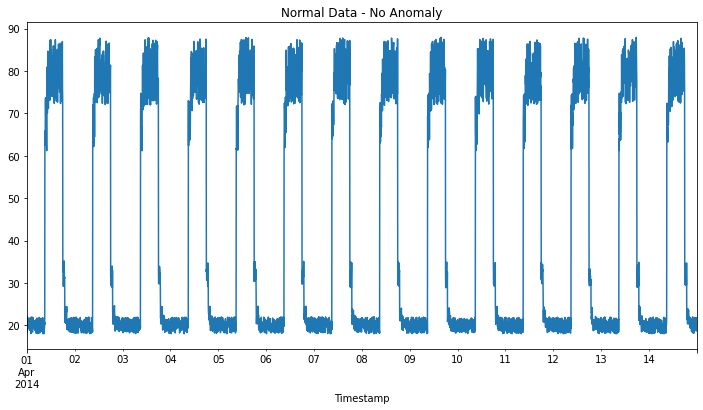

In [109]:
# Being satisified now that the datasets are as expected with those on the webite it is now time to have a look at the plots of both files. 
# This will give a further insight into the nature of the data.
# First the data with no anomalies - this can be considered "Normal" data.
fig, ax = plt.subplots(figsize=(12,6))
df_no_anomaly.plot(legend=False, ax=ax)
plt.title('Normal Data - No Anomaly')
plt.xlabel('Timestamp')
plt.show()

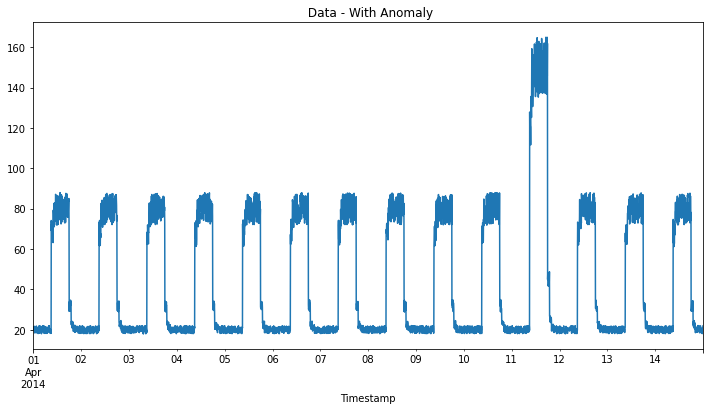

In [110]:
#Have a look at the plot of the small noise file with the anomaly. While not obvious from the basic data descriptions above it is clear from the plots where the data anomaly occours and the scale of it. The objective of the ML model is to be able to detect these anomalies. 
fig, ax = plt.subplots(figsize=(12,6))
df_daily_anomaly.plot(legend=False, ax=ax)
plt.title(' Data - With Anomaly')
plt.xlabel('Timestamp')
plt.show()

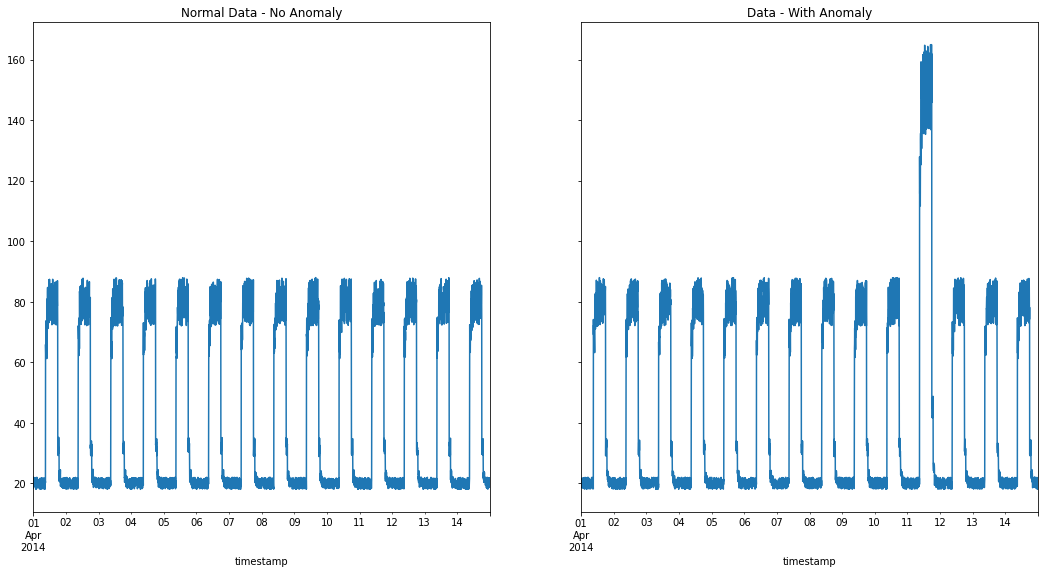

In [132]:
# Can have a look a both plots together using a common y scale. This gives a good view visually how the scale of the anomaly compares with the normal data. 
fig, (ax1,ax2) = plt.subplots(1,2,sharey='row',figsize=(18,9))
df_no_anomaly.plot(legend=False, ax=ax1)
ax1.set_title('Normal Data - No Anomaly')
df_daily_anomaly.plot(legend=False, ax=ax2)
ax2.set_title('Data - With Anomaly')
plt.show()

#### Preprocessing
https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/

This section covers the preparation of the data for the ML model. The objective here is to create a training dataset and a test dataset from the NoAnomlay dataset. The training set will be used to train the model and the test set to verify the level of model accuracy. 

It is very often the case that real world data to be presented to a ML model will have different scales or units of measure. For example in this case we can see that the y scale of the NoAnomaly data goes from a min of approx 18 and a max of approx 88, whereas the Anomaly data has a y scale of approx 18 to 165. ML models work best when the data is normalised to a standard scale and can perform poorly if thsi is ot done. The general approach is to create a standard set of input variables from the data that will result in all of the data fitting to a scale of 0 - 1 called data normalization or having a standard deviation of 1 and a mean of 0, called data standardization. In this evaluation data standardization is used. The general approach for each data element is as follows:

- y_std = (x - mean)/std_dev

where mean is the mean of the dataset, std_dev is the deviation and x is a data value. y_std is the resultant normalised value. 

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
It is possible to do his manually on all the dataset values, however Scikit Learn is a library specifically designed for machine learning in Python. It provides a Standard Scalar for data pre-processing as shown below. 


In [174]:
# Here we are going to create the training data set for the model Using Sklearn to standardise the data. 
# Import the standardsaclaer function. 
from sklearn.preprocessing import StandardScaler
# Load the dataset, in this case the NoAnomaly. 
data = df_no_anomaly
# Create the scaler
scaler = StandardScaler()
# Apply the datset to the scaler.
scaler.fit(data)
# Transdorm the dataset to the scaled values
standardized = scaler.transform(data)
# Create a dataframe for the new scaled dataset. 
df_training_value = pd.DataFrame(standardized)

In [175]:
# Have a look at the new scaled dataset, as expected the mean is effectively 0 (e-16) and the std deviation is effectively 1, the min is approx -0.87 and the max is approx 1.62.
df_training_value.describe()

,0
count,4.032000e+03
mean,2.201722e-16
std,1.000124e+00
min,-8.704745e-01
25%,-8.049175e-01
50%,-7.419724e-01
75%,1.175905e+00
max,1.622083e+00


In [183]:
# Have a look at soem of the values, first and last 5. 
df_training_value

,0
0,-0.858935
1,-0.729083
2,-0.848253
3,-0.729676
4,-0.731264
...,...
4027,-0.791745
4028,-0.780352
4029,-0.833744
4030,-0.735193


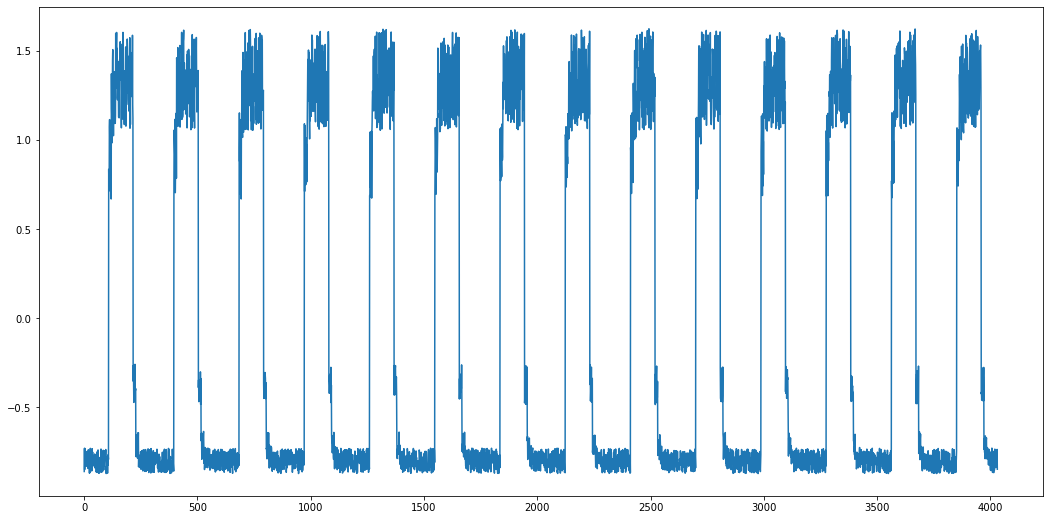

In [176]:
# Have a look at the plot. Overall it looks the same as the original dataset but now with the scale changed as described above. 
# Also note the x scale is also changed, the timestamps have been replaced by the loc reference of each data element from 0 to 4032.
fig, ax = plt.subplots(figsize=(18,9))
df_training_value.plot(legend=False, ax=ax);

In [186]:
# To better assess patterns in data a technique called window sliding is used. This technique can be used for training ML models, each 'window' of data can be used to train the model in sequence.  
# https://www.geeksforgeeks.org/window-sliding-technique/
# https://www.techtarget.com/searchnetworking/definition/sliding-windows
# While it is a simple process to calculate, for example, the mean of the overall data set, on a time series of data points it may be more interesting to have a look at the mean over some fixed period and to see how the mean then trends in value over the full time series for each fixed period. This technique is also a fundamental part of the TCP transmission control protocol between computers 
# The data set contains 4032 data points over 14 days so each day has 4032/14 = 288 data points so this would appear to be a reasonable approach for calculating the window size. 
 
time_steps = 288

# The code below will break up the 4032 data points into overlapping sets of 288 data points. 
# Function to generate the training sequences for use in the model.
# Note the function returns np.stack. This is used to join arrays together to create a single array. 
#https://numpy.org/doc/stable/reference/generated/numpy.stack.html
def create_windows(values, time_steps):
    output = []
    for i in range(len(values) - time_steps + 1):
        output.append(values[i : (i + time_steps)])
    return np.stack(output)


x_train = create_windows(df_training_value.values, time_steps)
print("Training input shape: ", x_train.shape)

Training input shape:  (3745, 288, 1)


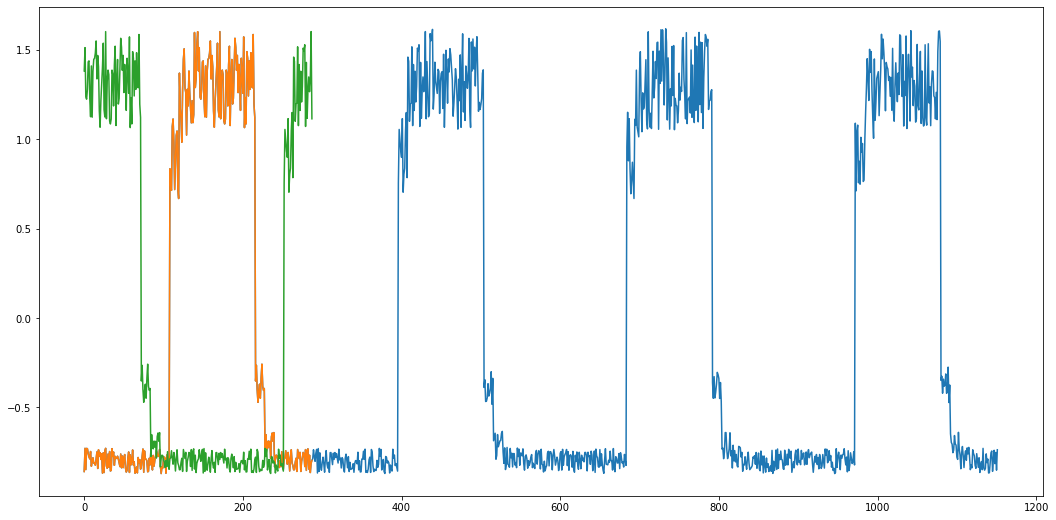

In [209]:
# Have a look at one of the windows superimposed on a selection of the overall training data. Have picked window # 0 and # 144.
# Flatten is used to change the shape of the training input window to a 1D series so each window can be though of as a series of 288 values. 
# https://www.w3resource.com/numpy/manipulation/ndarray-flatten.php
fig, ax = plt.subplots(figsize=(18,9))
y = df_training_value.values[:1152]
ax.plot(y);
w = x_train[0].flatten()
ax.plot(w);
z = x_train[144].flatten()
ax.plot(z)

In [172]:
#Redo the  the layers, and add in comments on what they are.
#Figure out what they all mean.

layers = []

### Build the Neural network

In [ ]:
#Explain  all of this
#What is a convolutional layer, look up towards data science.
model = keras.Sequential(
    [
        keras.layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        keras.layers.Conv1D(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        keras.layers.Dropout(rate=0.2),
        keras.layers.Conv1D(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        keras.layers.Conv1DTranspose(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        keras.layers.Dropout(rate=0.2),
        keras.layers.Conv1DTranspose(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        keras.layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ]
)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()

In [ ]:
# Explain what this is, model.fit
#https://keras.io/api/models/model_training_apis/
history = model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")],
)

In [ ]:
history.history.keys()

In [ ]:
#Get information on model.fit history.
#https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
plt.figure(figsize=(18,9))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend();

In [ ]:
# Get train MAE loss. What is this.
x_train_pred = model.predict(x_train)
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

In [ ]:
# Checking how the first sequence is learnt, the NN prediction of the output vs the actual output.
plt.plot(x_train[0])
plt.plot(x_train_pred[0]);

In [ ]:

#Break all of this to explain and demonstrate.
df_test_value = (df_daily_anomaly - training_mean) / training_stdev
fig, ax = plt.subplots(figsize=(18,9))
df_test_value.plot(legend=False, ax=ax);
plt.show()

# Create sequences from test values.
x_test = create_windows(df_test_value.values)
print("Test input shape: ", x_test.shape)

# Get test MAE loss.
x_test_pred = model.predict(x_test)
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)
test_mae_loss = test_mae_loss.reshape((-1))

plt.hist(test_mae_loss, bins=50)
plt.xlabel("test MAE loss")
plt.ylabel("No of samples")
plt.show()

# Detect all the samples which are anomalies.
anomalies = test_mae_loss > threshold
print("Number of anomaly samples: ", np.sum(anomalies))
print("Indices of anomaly samples: ", np.where(anomalies))

In [ ]:
# data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies
#https://www.sharpsightlabs.com/blog/numpy-all/

anomalous_data_indices = []
for data_idx in range(time_steps - 1, len(df_test_value) - time_steps + 1):
    if np.all(anomalies[data_idx - time_steps + 1 : data_idx]):
        anomalous_data_indices.append(data_idx)

In [ ]:
df_subset = df_daily_anomaly.iloc[anomalous_data_indices]
df_subset

In [ ]:
fig, ax = plt.subplots(figsize=(18,9))
df_daily_anomaly.plot(legend=False, ax=ax)
df_subset.plot(legend=False, ax=ax, color="r")
plt.show;